# Formula 1 Data Analisys

<h2>Packages</h2>

In [78]:
import pandas as pd
import numpy as np
from IPython.display import display_html 
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns

ActualYear = 2021

Years = list()
Years = [i for i in range(1950,ActualYear)]

YearsTeams = list()
YearsTeams = [i for i in range(1958,ActualYear)]

## Import the data

In [79]:
DriversRaw = list()
DriversRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/drivers.html') for i in range(1950,ActualYear)] 

In [80]:
TeamsRaw = list()
TeamsRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/team.html') for i in range(1958,ActualYear)] 

In [81]:
RacesRaw = list()
RacesRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/races.html') for i in range(1950,ActualYear)]

In [82]:
FastLapsRaw = list()
FastLapsRaw = [pd.read_html('https://www.formula1.com/en/results.html/'+str(i)+'/fastest-laps.html') for i in range(1950,ActualYear)]

## Save Data as .csv files

In [83]:
for year in Years: 
    DriversRaw[year-1950][0].to_csv(r'.\data\Drivers\Drivers'+str(year)+'.csv', index = False)
    TeamsRaw[year-1958][0].to_csv(r'.\data\Teams\Teams'+str(year)+'.csv', index = False)
    RacesRaw[year-1950][0].to_csv(r'.\data\Races\Races'+str(year)+'.csv', index = False)
    FastLapsRaw[year-1950][0].to_csv(r'.\data\FastestLaps\FastestLaps'+str(year)+'.csv', index = False)

## Load local .csv files

In [197]:
DriversRaw = list()
DriversRaw = [pd.read_csv('.\data\Drivers\Drivers'+str(i)+'.csv') for i in Years] 
TeamsRaw = list()
TeamsRaw = [pd.read_csv('.\data\Teams\Teams'+str(i)+'.csv') for i in range(1958,ActualYear)] 
RacesRaw = list()
RacesRaw = [pd.read_csv('.\data\Races\Races'+str(i)+'.csv') for i in Years] 
FastLapsRaw = list()
FastLapsRaw = [pd.read_csv('.\data\FastestLaps\FastestLaps'+str(i)+'.csv') for i in Years] 

In [198]:
for year in Years: 
    DriversRaw[year-1950] = pd.DataFrame(DriversRaw[year-1950])
    TeamsRaw[year-1958] = pd.DataFrame(TeamsRaw[year-1958])
    RacesRaw[year-1950] = pd.DataFrame(RacesRaw[year-1950])
    FastLapsRaw[year-1950] = pd.DataFrame(FastLapsRaw[year-1950])

In [199]:
print(f'Total Drivers: {len(DriversRaw)}')
print(f'Total Teams: {len(TeamsRaw)}')
print(f'Total Races Year Data: {len(RacesRaw)}')
print(f'Total Fastest Laps: {len(FastLapsRaw)}')

Total Drivers: 71
Total Teams: 63
Total Races Year Data: 71
Total Fastest Laps: 71


## Number of World Driver Champions (WDC) and World Constructors Champions (WCC)

### Constructors (WCC)

In [200]:
ConstructorChampions = [TeamsRaw[i].Team[0] for i in range(0,ActualYear-1958)]

for i in range(0,len(ConstructorChampions)):
    if "McLaren" in ConstructorChampions[i]:
        ConstructorChampions[i]="McLaren"
    if ("RBR" in ConstructorChampions[i]) or ("Red Bull Racing" in ConstructorChampions[i]):
        ConstructorChampions[i]="Red Bull"
    if "Williams" in ConstructorChampions[i]:
        ConstructorChampions[i]="Williams"
    if "Lotus" in ConstructorChampions[i]:
        ConstructorChampions[i]="Lotus"

UniqueTeamsChampionms = np.array(ConstructorChampions)

WCC = pd.DataFrame(columns=["Team","WCC"])

for team in np.unique(UniqueTeamsChampionms):
    WCC = WCC.append({'Team':team,'WCC':ConstructorChampions.count(team)},ignore_index=True)

WCC=WCC.sort_values(by=["WCC"],ascending=False)

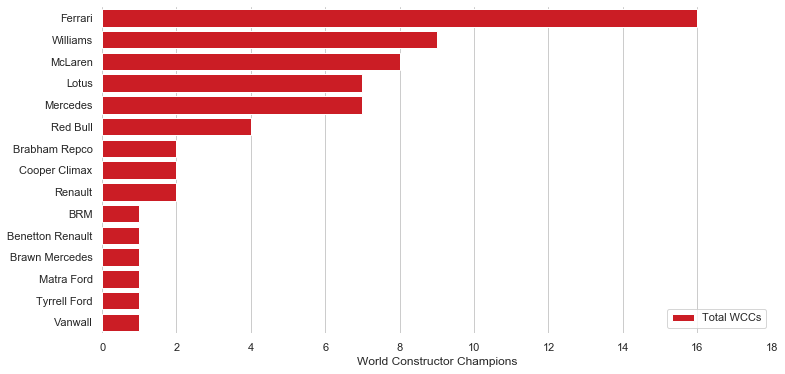

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("bright")
sns.barplot(x="WCC", y="Team", data=WCC, label="Total WCCs", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 18), ylabel="",xlabel="World Constructor Champions")
sns.despine(left=True, bottom=True)

### Difference in WCC between 1st and 2nd, and 1st and 3th

In [202]:
Teams1and2Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[1] for i in range(0,ActualYear-1958)] 
Teams1and3Diff = [TeamsRaw[i].PTS[0]-TeamsRaw[i].PTS[2] for i in range(0,ActualYear-1958)] 

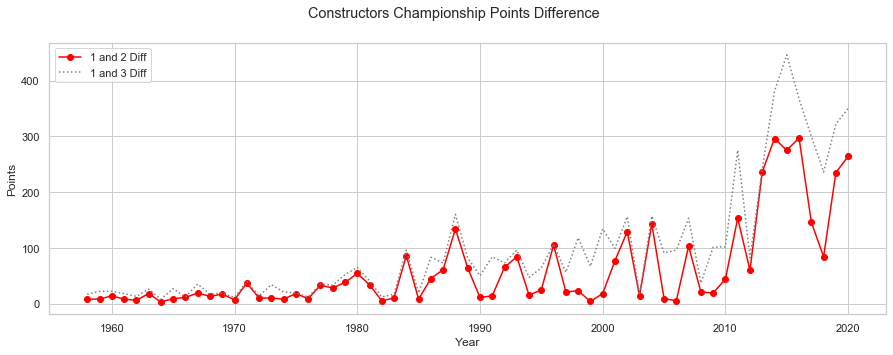

In [203]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 5))
plt.plot(YearsTeams,Teams1and2Diff,marker='o',color='red')
plt.plot(YearsTeams,Teams1and3Diff,ls=':',color='grey')
    
plt.suptitle('Constructors Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(["1 and 2 Diff", "1 and 3 Diff"])

In [204]:
MaxDiff= max(Teams1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MaxDiff)])
TeamsRaw[Teams1and2Diff.index(MaxDiff)].loc[0:1]

297 points between 1rs and 2nd in 2008


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Mercedes,765,NaN
1,NaN,2,Red Bull Racing TAG Heuer,468,NaN


In [205]:
MinDiff= min(Teams1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Teams1and2Diff.index(MinDiff)])
TeamsRaw[Teams1and2Diff.index(MinDiff)].loc[0:1]

3 points between 1rs and 2nd in 1956


,Unnamed: 0,Pos,Team,PTS,Unnamed: 4
0,NaN,1,Ferrari,45,NaN
1,NaN,2,BRM,42,NaN


### Difference in WCC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [206]:
Teams1and2DiffPerc = [(Teams1and2Diff[i]/TeamsRaw[i].PTS[1])*100 for i in range(0,ActualYear-1958)] 
Teams1and3DiffPerc = [(Teams1and3Diff[i]/TeamsRaw[i].PTS[2])*100 for i in range(0,ActualYear-1958)] 

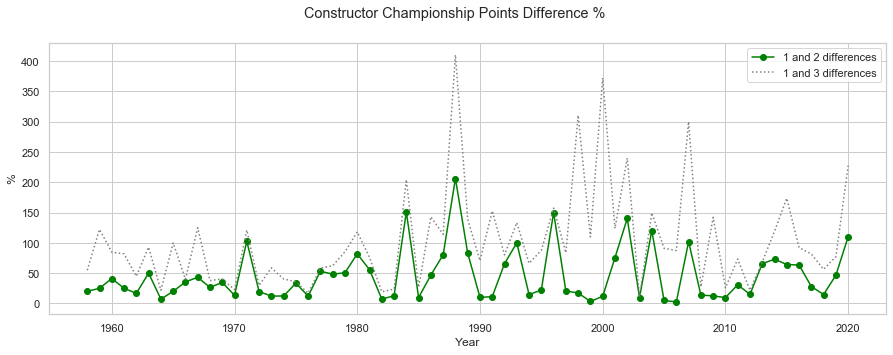

In [207]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 5))
plt.plot(YearsTeams,Teams1and2DiffPerc,marker='o',color='green')
plt.suptitle('Constructor Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.plot(YearsTeams,Teams1and3DiffPerc,ls=':',color='grey')
plt.legend(["1 and 2 differences", "1 and 3 differences"])

### Drivers (WDC)

In [208]:
DriversChampions = [DriversRaw[i].Driver[0] for i in range(0,ActualYear-1950)]
uniqueDriversChampions = np.array(DriversChampions)

WDCPerDriver = pd.DataFrame(columns=["Driver","WDC"])

for driver in np.unique(uniqueDriversChampions):
    WDCPerDriver = WDCPerDriver.append({'Driver':driver,'WDC':DriversChampions.count(driver)},ignore_index=True)

WDCPerDriver.sort_values(by=["WDC"],ascending=False)

,Driver,WDC
23,Michael Schumacher MSC,7
21,Lewis Hamilton HAM,7
18,Juan Manuel Fangio FAN,5
0,Alain Prost PRO,4
32,Sebastian Vettel VET,4
29,Niki Lauda LAU,3
9,Jack Brabham BRA,3
26,Nelson Piquet PIQ,3
10,Jackie Stewart STE,3
3,Ayrton Senna SEN,3


## 

##

#### Difference in WDC between 1st and 2nd, and 1st and 3th

In [209]:
Drivers1and2Diff = [DriversRaw[i].PTS[0]-DriversRaw[i].PTS[1] for i in range(0,ActualYear-1950)] 
Drivers1and3Diff = [DriversRaw[i].PTS[0]-DriversRaw[i].PTS[2] for i in range(0,ActualYear-1950)] 

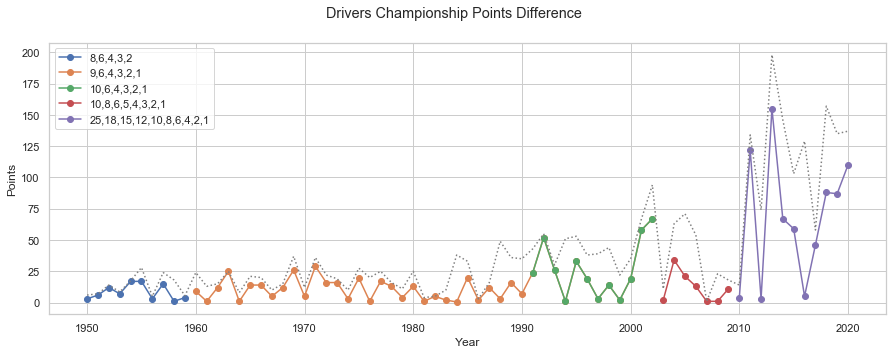

In [233]:
import matplotlib.pyplot as plt

SystemsDriversPoints = list()
SystemsDriversPoints.append([Years[0:(1960-1950)],Drivers1and2Diff[0:(1960-1950)]])
SystemsDriversPoints.append([Years[(1960-1950):(2003-1950)],Drivers1and2Diff[(1960-1950):(2003-1950)]])
SystemsDriversPoints.append([Years[(1991-1950):(2003-1950)],Drivers1and2Diff[(1991-1950):(2003-1950)]])
SystemsDriversPoints.append([Years[(2003-1950):(2010-1950)],Drivers1and2Diff[(2003-1950):(2010-1950)]])
SystemsDriversPoints.append([Years[(2010-1950):(ActualYear-1950)],Drivers1and2Diff[(2010-1950):(ActualYear-1950)]])


plt.subplots(figsize=(15, 5))

for system in SystemsDriversPoints:
        plt.plot(system[0],system[1],marker='o')

plt.plot(Years,Drivers1and3Diff,color="grey",ls=':')

plt.suptitle('Drivers Championship Points Difference')
plt.xlabel("Year")
plt.ylabel("Points")
plt.legend(["8,6,4,3,2",'9,6,4,3,2,1','10,6,4,3,2,1','10,8,6,5,4,3,2,1','25,18,15,12,10,8,6,4,2,1'])

In [211]:
MaxDiff= max(Drivers1and2Diff)
print(MaxDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MaxDiff)])
DriversRaw[Drivers1and2Diff.index(MaxDiff)].loc[0:1]

155 points between 1rs and 2nd in 2013


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,397,NaN
1,NaN,2,Fernando Alonso ALO,ESP,Ferrari,242,NaN


In [212]:
MinDiff= min(Drivers1and2Diff)
print(MinDiff,"points between 1rs and 2nd in",Years[Drivers1and2Diff.index(MinDiff)])
DriversRaw[Drivers1and2Diff.index(MinDiff)].loc[0:1]

0.5 points between 1rs and 2nd in 1984


,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Unnamed: 6
0,NaN,1,Niki Lauda LAU,AUT,McLaren TAG,72.0,NaN
1,NaN,2,Alain Prost PRO,FRA,McLaren TAG,71.5,NaN


#### Difference in WDC between 1st and 2nd, and 1st and 3th in % considering the total of the 2nd and 3th respect to the 1st

In [213]:
Drivers1and2DiffPerc = [(Drivers1and2Diff[i]/DriversRaw[i].PTS[1])*100 for i in range(0,ActualYear-1950)] 
Drivers1and3DiffPerc = [(Drivers1and3Diff[i]/DriversRaw[i].PTS[2])*100 for i in range(0,ActualYear-1950)] 

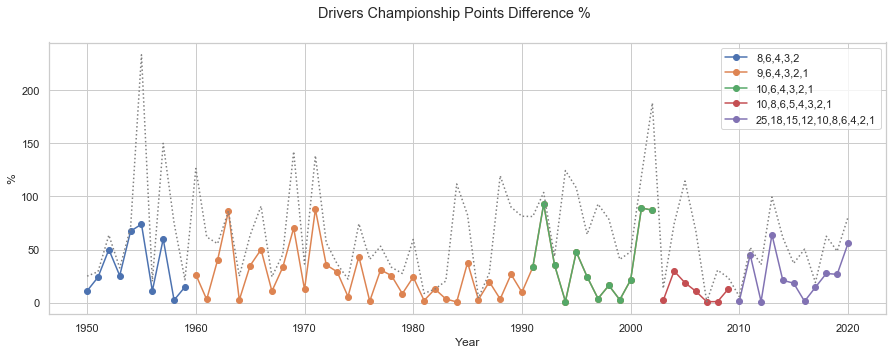

In [214]:
import matplotlib.pyplot as plt

SystemsDriversPoints = list()
SystemsDriversPoints.append([Years[0:(1960-1950)],Drivers1and2DiffPerc[0:(1960-1950)]])
SystemsDriversPoints.append([Years[(1960-1950):(2003-1950)],Drivers1and2DiffPerc[(1960-1950):(2003-1950)]])
SystemsDriversPoints.append([Years[(1991-1950):(2003-1950)],Drivers1and2DiffPerc[(1991-1950):(2003-1950)]])
SystemsDriversPoints.append([Years[(2003-1950):(2010-1950)],Drivers1and2DiffPerc[(2003-1950):(2010-1950)]])
SystemsDriversPoints.append([Years[(2010-1950):(ActualYear-1950)],Drivers1and2DiffPerc[(2010-1950):(ActualYear-1950)]])


plt.subplots(figsize=(15, 5))

for system in SystemsDriversPoints:
        plt.plot(system[0],system[1],marker='o')
plt.plot(Years,Drivers1and3DiffPerc,color="grey",ls=':')

plt.suptitle('Drivers Championship Points Difference %')
plt.xlabel("Year")
plt.ylabel("%")
plt.legend(["8,6,4,3,2",'9,6,4,3,2,1','10,6,4,3,2,1','10,8,6,5,4,3,2,1','25,18,15,12,10,8,6,4,2,1'])

<h1> </h1>

## Races

### Races per year

In [215]:
RacesCount = [RacesRaw[i].shape[0] for i in range(0,ActualYear-1950)]

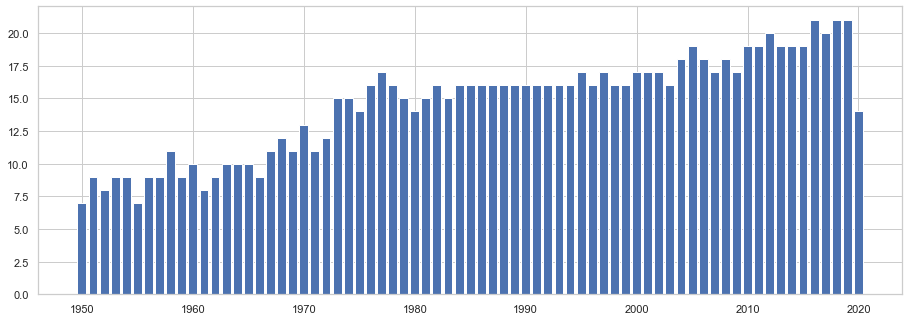

In [216]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesCount)
plt.show()

<h1></h1>

### Races won by the WDC per year

In [217]:
year = 0
count = 0
RacesWinChampions = list()
for driver in DriversChampions:
    for race in RacesRaw[year].Winner:
        if driver==race:
            count=count+1
    year=year+1
    RacesWinChampions.append(count)
    count=0

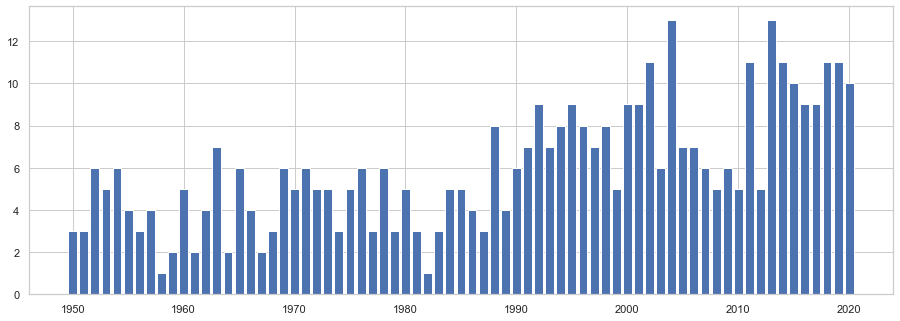

In [218]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampions)
plt.show()

In [219]:
MostWins=max(RacesWinChampions)
print("Most races wins in a year is",MostWins,"by",DriversChampions[RacesWinChampions.index(MostWins)],"in",Years[RacesWinChampions.index(MostWins)])

LessWins=min(RacesWinChampions)
print("Less races wins in a year is",LessWins,"by",DriversChampions[RacesWinChampions.index(LessWins)],"in",Years[RacesWinChampions.index(LessWins)],", and Keke  Rosberg  ROS in 1982")

Most races wins in a year is 13 by Michael  Schumacher  MSC in 2004
Less races wins in a year is 1 by Mike  Hawthorn  HAW in 1958 , and Keke  Rosberg  ROS in 1982


### Races won by the WDC per year in % respect the total races

In [220]:
RacesWinChampionsPerc = list()
RacesWinChampionsPerc = [(RacesWinChampions[year]/RacesCount[year])*100 for year in range(0,len(Years))]

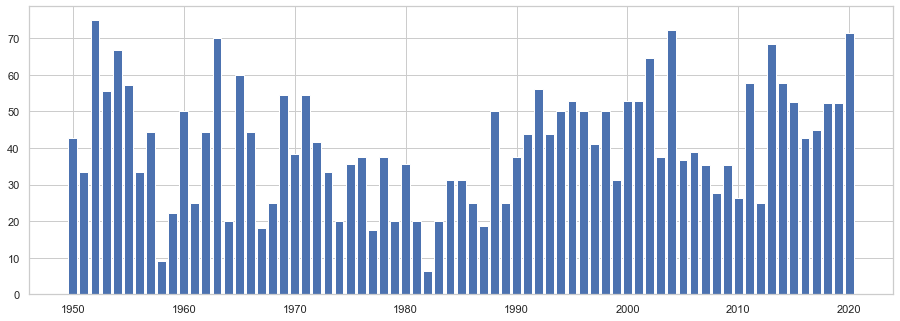

In [221]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,RacesWinChampionsPerc)
plt.show()

In [222]:
MostPerWins=max(RacesWinChampionsPerc)
print("Most races wins in a year is",MostPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(MostPerWins)],"in",Years[RacesWinChampionsPerc.index(MostPerWins)])

LessPerWins=min(RacesWinChampionsPerc)
print("Less races wins in a year is",LessPerWins,"% by",DriversChampions[RacesWinChampionsPerc.index(LessPerWins)],"in",Years[RacesWinChampionsPerc.index(LessPerWins)])

Most races wins in a year is 75.0 % by Alberto  Ascari  ASC in 1952
Less races wins in a year is 6.25 % by Keke  Rosberg  ROS in 1982


<h1> </h1>

### Grand Prix's numbers

In [223]:
RacesRaw = pd.DataFrame(RacesRaw)
CountriesRacesList=list()
CountriesRaces = pd.DataFrame(columns=["GPs","Times"])

for year in Years:
    for race in np.unique(RacesRaw[0][year-1950]["Grand Prix"]):
        CountriesRacesList.append(race)
        
uniqueGPs = np.array(CountriesRacesList)

for race in np.unique(uniqueGPs):
    CountriesRaces = CountriesRaces.append({'GPs':race,'Times':CountriesRacesList.count(race)},ignore_index=True)

Exit = CountriesRaces.sort_values(by=["Times"],ascending=False)

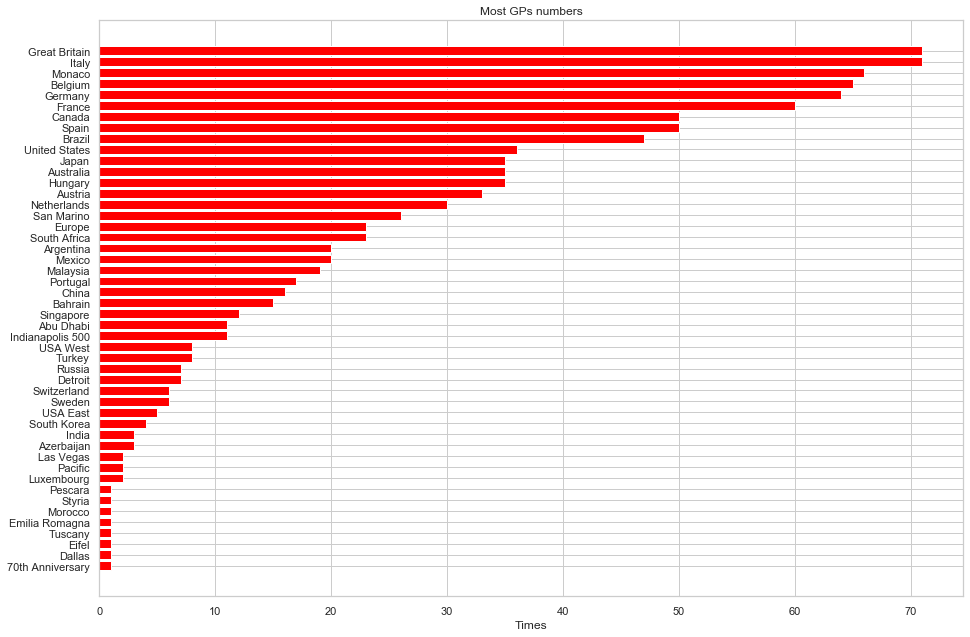

In [224]:
import matplotlib.pyplot as plt

fig, plt = plt.subplots()
plt = fig.add_axes([0,0,2,2])

plt.set_title('Most GPs numbers')
plt.set_xlabel('Times')

plt.barh(Exit["GPs"], Exit["Times"],color="red")
plt.invert_yaxis()

<h3>Laps in Grand Prix</h3>

#### More laps in a single Grand Prix

In [225]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 0

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1950])-1)):
        if not np.isnan(RacesRaw[0][year-1950].loc[race].Laps):
            if int(RacesRaw[0][year-1950].loc[race].Laps) > Laps and (int(RacesRaw[0][year-1950].loc[race].Laps)<200):
                Laps = int(RacesRaw[0][year-1950].loc[race].Laps)
                Carrera = RacesRaw[0][year-1950].loc[race]

pd.DataFrame(Carrera)

,2
Unnamed: 0,NaN
Grand Prix,Indianapolis 500
Date,30 May 1950
Winner,Johnnie Parsons PAR
Car,Kurtis Kraft Offenhauser
Laps,138
Time,2:46:55.970
Unnamed: 7,NaN


#### Less laps in a single Grand Prix

In [226]:
RacesRaw = pd.DataFrame(RacesRaw)
Laps = 200

for year in Years:
    for race in range(0,(len(RacesRaw[0][year-1950])-1)):
        if not np.isnan(RacesRaw[0][year-1950].loc[race].Laps):
            if int(RacesRaw[0][year-1950].loc[race].Laps) < Laps:
                Laps = int(RacesRaw[0][year-1950].loc[race].Laps)
                Carrera = RacesRaw[0][year-1950].loc[race]

pd.DataFrame(Carrera)

,6
Unnamed: 0,NaN
Grand Prix,Germany
Date,01 Aug 1971
Winner,Jackie Stewart STE
Car,Tyrrell Ford
Laps,12
Time,1:29:15.700
Unnamed: 7,NaN


<h3>Average Race Total Time per year</h3>

In [227]:
NaNRacesTime = 0
minutesYear = 0
TimePerYear = list()

for year in Years:
    for race in range(0,RacesCount[year-1950]):
        if (isinstance(RacesRaw[0][year-1950].Time[race], str)):
            TimeRace = RacesRaw[0][year-1950].Time[race]
            TimeRace = TimeRace.split(':')
            if len(TimeRace)==3:
                minutesYear = minutesYear+(int(TimeRace[0])*60)+(int(TimeRace[1]))
            else:
                minutesYear = minutesYear+(int(TimeRace[0]))
        else:
            NaNRacesTime=NaNRacesTime+1
    TimePerYear.append(minutesYear/((RacesCount[year-1950])-NaNRacesTime))
    NaNRacesTime = 0
    minutesYear = 0

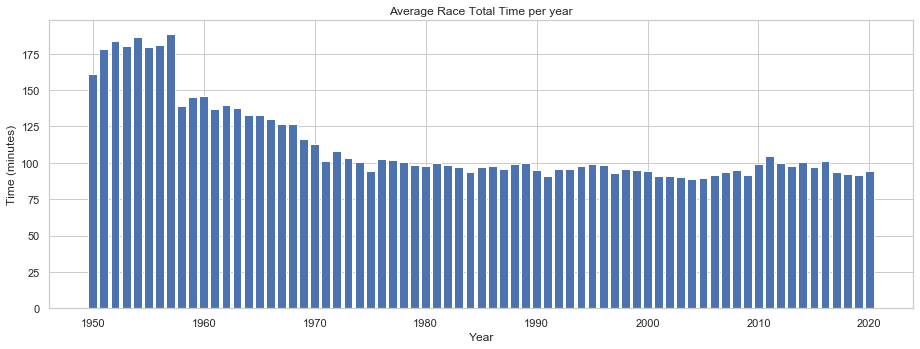

In [228]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,TimePerYear)
ax.set_title('Average Race Total Time per year')
ax.set_xlabel('Year')
ax.set_ylabel('Time (minutes)')
plt.show()

<h2>Fastest Laps</h2>

### Driver more Fastest Laps 

In [229]:
DriversWithFL = list()
for year in range(0,ActualYear-1950):
    for driver in range(0, len(FastLapsRaw[year])):
        DriversWithFL.append(FastLapsRaw[year].Driver[driver])
uniqueDriversWithFL = np.array(DriversWithFL)

FLPerDriver = pd.DataFrame(columns=["Driver","Fastest Laps Number"])

for driver in np.unique(uniqueDriversWithFL):
    FLPerDriver = FLPerDriver.append({'Driver':driver,'Fastest Laps Number':DriversWithFL.count(driver)},ignore_index=True)

FLPerDriver.sort_values(by=["Fastest Laps Number"],ascending=False).head()


,Driver,Fastest Laps Number
88,Michael Schumacher MSC,76
77,Lewis Hamilton HAM,53
74,Kimi Räikkönen RAI,46
1,Alain Prost PRO,41
120,Sebastian Vettel VET,38


### Fastest Laps average per year

In [230]:
NaNRacesTime = 0
secondsYear = 0
FastLapYear = list()

for year in Years:
    for race in range(0,FastLapsRaw[year-1950].count()[1]):
        if (isinstance(FastLapsRaw[year-1950].Time[race], str)):
            FastLapTime = FastLapsRaw[year-1950].Time[race]
            FastLapTime = FastLapTime.split(':')
            if len(FastLapTime)==2:
                FastLapTime[1] = FastLapTime[1].split('.')
                secondsYear = secondsYear+(int(FastLapTime[0])*60)+(int(FastLapTime[1][0]))
            else:
                FastLapTime[0] = FastLapTime[0].split('.')
                secondsYear = secondsYear+(int(FastLapTime[0][0]))
        else:
            NaNRacesTime=NaNRacesTime+1
    FastLapYear.append(secondsYear/((FastLapsRaw[year-1950].count()[1])-NaNRacesTime))
    NaNRacesTime = 0
    secondsYear = 0

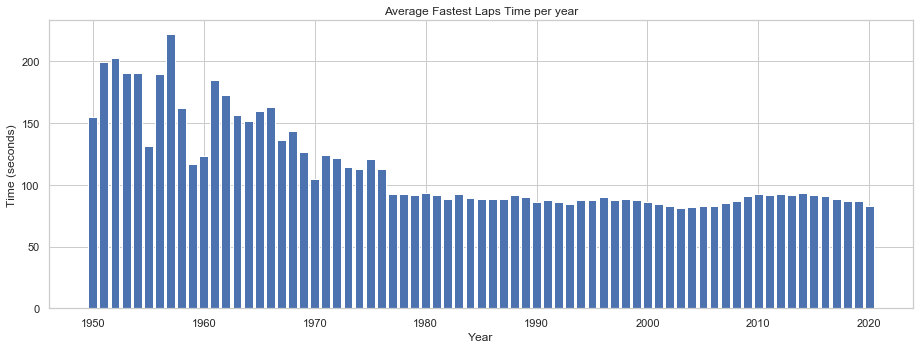

In [231]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(Years,FastLapYear)
ax.set_title('Average Fastest Laps Time per year')
ax.set_xlabel('Year')
ax.set_ylabel('Time (seconds)')
plt.show()

In [232]:
CarFL = list()
for year in range(0,ActualYear-1950):
    for car in range(0, len(FastLapsRaw[year])):
        CarFL.append(FastLapsRaw[year].Car[car])
uniqueCarFL = np.array(CarFL)

FLPerCar = pd.DataFrame(columns=["Car","Fastest Laps Number"])

for car in np.unique(uniqueCarFL):
    FLPerCar = FLPerCar.append({'Car':car,'Fastest Laps Number':CarFL.count(car)},ignore_index=True)

FLPerCar.sort_values(by=["Fastest Laps Number"],ascending=False).head()


,Car,Fastest Laps Number
18,Ferrari,251
45,McLaren Mercedes,84
48,Mercedes,74
73,Williams Renault,70
53,Red Bull Racing Renault,35
